In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
def propagazione_cursori(Vdiv, measure):

    sigma = np.sqrt( (0.04 * Vdiv)**2 + (0.015 * measure)**2)

    return sigma

In [3]:
def lin(x, a, b):  
    return a + b * x

def esp(x, a, b, c):  
    return a + b * np.exp(- x * c**-1)

In [4]:
# OSC DATA
file_in =  '../../Data/PreAmp/calib_in_18.txt'
file_vdiv =  '../../Data/PreAmp/calib_in_vdiv_18.txt'

# ARDUINO DATA
file1 = '../../Data/PreAmp/calib_02_18_ROOT.dat'
file2 = '../../Data/PreAmp/calib_05_18_ROOT.dat'
file3 = '../../Data/PreAmp/calib_08_18_ROOT.dat'
file4 = '../../Data/PreAmp/calib_10_18_ROOT.dat'
file5 = '../../Data/PreAmp/calib_12_18_ROOT.dat'
file6 = '../../Data/PreAmp/calib_15_18_ROOT.dat'
file7 = '../../Data/PreAmp/calib_18_18_ROOT.dat'
file8 = '../../Data/PreAmp/calib_20_18_ROOT.dat'
file9 = '../../Data/PreAmp/calib_21_18_ROOT.dat'
file10 = '../../Data/PreAmp/calib_22_18_ROOT.dat'
file11 = '../../Data/PreAmp/calib_23_18_ROOT.dat'
file12 = '../../Data/PreAmp/calib_24_18_ROOT.dat'
file13 = '../../Data/PreAmp/calib_25_18_ROOT.dat'

# READ ARDUINO DATA
data1 = pd.read_csv(file1, sep = ' ', index_col = False, header = None)
data1.index = np.arange(1, len(data1)+1)
data1.columns = ['time', 'ADC']
data2 = pd.read_csv(file2, sep = ' ', index_col = False, header = None)
data2.index = np.arange(1, len(data2)+1)
data2.columns = ['time', 'ADC']
data3 = pd.read_csv(file3, sep = ' ', index_col = False, header = None)
data3.index = np.arange(1, len(data3)+1)
data3.columns = ['time', 'ADC']
data4 = pd.read_csv(file4, sep = ' ', index_col = False, header = None)
data4.index = np.arange(1, len(data4)+1)
data4.columns = ['time', 'ADC']
data5 = pd.read_csv(file5, sep = ' ', index_col = False, header = None)
data5.index = np.arange(1, len(data5)+1)
data5.columns = ['time', 'ADC']
data6 = pd.read_csv(file6, sep = ' ', index_col = False, header = None)
data6.index = np.arange(1, len(data6)+1)
data6.columns = ['time', 'ADC']
data7 = pd.read_csv(file7, sep = ' ', index_col = False, header = None)
data7.index = np.arange(1, len(data7)+1)
data7.columns = ['time', 'ADC']
data8 = pd.read_csv(file8, sep = ' ', index_col = False, header = None)
data8.index = np.arange(1, len(data8)+1)
data8.columns = ['time', 'ADC']
data9 = pd.read_csv(file9, sep = ' ', index_col = False, header = None)
data9.index = np.arange(1, len(data9)+1)
data9.columns = ['time', 'ADC']
data10 = pd.read_csv(file10, sep = ' ', index_col = False, header = None)
data10.index = np.arange(1, len(data10)+1)
data10.columns = ['time', 'ADC']
data11 = pd.read_csv(file11, sep = ' ', index_col = False, header = None)
data11.index = np.arange(1, len(data11)+1)
data11.columns = ['time', 'ADC']
data12 = pd.read_csv(file12, sep = ' ', index_col = False, header = None)
data12.index = np.arange(1, len(data12)+1)
data12.columns = ['time', 'ADC']
data13 = pd.read_csv(file13, sep = ' ', index_col = False, header = None)
data13.index = np.arange(1, len(data13)+1)
data13.columns = ['time', 'ADC']

# GET MAX VALUES
max1 = data1['ADC'].max()
max2 = data2['ADC'].max()
max3 = data3['ADC'].max()
max4 = data4['ADC'].max()
max5 = data5['ADC'].max()
max6 = data6['ADC'].max()
max7 = data7['ADC'].max()
max8 = data8['ADC'].max()
max9 = data9['ADC'].max()
max10 = data10['ADC'].max()
max11 = data11['ADC'].max()
max12 = data12['ADC'].max()
max13 = data13['ADC'].max()
max_values = np.array([max1, max2, max3, max4, max5, max6, max7, max8, max9, max10, max11, max12, max13])

# READ OSC DATA
Vin = np.loadtxt(file_in)
Vdiv = np.loadtxt(file_vdiv)

# MAKE DATAFRAME
data = pd.DataFrame({'max_values': list(max_values), 'Vin': list(Vin), 'Vdiv': list(Vdiv)}, columns = ['max_values', 'Vin', 'Vdiv'])

# ERROR PROPAGATION ON OSC DATA
data['err Vin'] = propagazione_cursori(data['Vdiv'], data['Vin'])

# SELECT RELEVANT DATAPOINTS
data = data.iloc[:4,:]

# SHOW DATA
data

,max_values,Vin,Vdiv,err Vin
0,1019,0.206,0.05,0.003681
1,1383,0.512,0.10,0.008659
2,1765,0.824,0.20,0.014723
3,2019,1.020,0.20,0.017265


In [5]:
# PERFORM THE FIT
par, cov = curve_fit(f = lin, xdata = data['max_values'], ydata = data['Vin'], sigma = data['err Vin'], absolute_sigma = True)

# GET FIT PARAMETERS AND PARAMETER ERRORS
error = []
for i in range(len(par)):
    try:
        error.append(np.absolute(cov[i][i])**0.5)
    except:
        error.append( 0.00 )

fit_par = par
fit_err = np.array(error)

a_calib = fit_par[0]
b_calib = fit_par[1]
err_a_calib = fit_err[0]
err_b_calib = fit_err[1]

# PRINT CALIBRATION FUNCTION
print(
        'VOLT = ' +  ' (' + format(a_calib, '.3f') + ' +/- ' + format(err_a_calib, '.3f') + ') ' + ' + ' 
        + ' (' + format(b_calib, '.6f') + ' +/- ' + format(err_b_calib, '.6f') + ') ' + ' ADC'
    )

VOLT =  (-0.633 +/- 0.015)  +  (0.000824 +/- 0.000013)  ADC


In [6]:
# ARDUINO WAVEFORM DATA
file_name = '../../Data/PreAmp/data_arduino.dat'

# READ DATA
data = pd.read_csv(file_name, index_col = False, header = None, sep = ' ')
data.index = np.arange(1, len(data)+1)

data.columns = ['time', 'ADC']

# CALIBRATION
# on time
data['time (ms)'] = data['time'] * 1e3 * 955000**-1
# on tension
data['V (V)'] = a_calib + b_calib * data['ADC']

# TOTAL ERROR PROPAGATION
data['err V (V)'] = np.sqrt( ( err_a_calib )**2 + ( err_b_calib  * data['ADC'] )**2)

# ERROR PROPAGATION SENZA CONTRIBUTO DI SCALA
data['err Vr (V)'] = err_a_calib

# SHOW DATA
data

,time,ADC,time (ms),V (V),err V (V),err Vr (V)
1,1,795,0.001047,0.022105,0.017875,0.014785
2,2,793,0.002094,0.020457,0.017861,0.014785
3,3,793,0.003141,0.020457,0.017861,0.014785
4,4,798,0.004188,0.024577,0.017897,0.014785
5,5,795,0.005236,0.022105,0.017875,0.014785
...,...,...,...,...,...,...
2043,2043,793,2.139267,0.020457,0.017861,0.014785
2044,2044,776,2.140314,0.006450,0.017741,0.014785
2045,2045,787,2.141361,0.015514,0.017819,0.014785
2046,2046,788,2.142408,0.016337,0.017826,0.014785


In [7]:
data['V (mV)'] = data['V (V)'] * 1e3
data['err V (mV)'] = data['err V (V)'] * 1e3
data['err Vr (mV)'] = data['err Vr (V)'] * 1e3

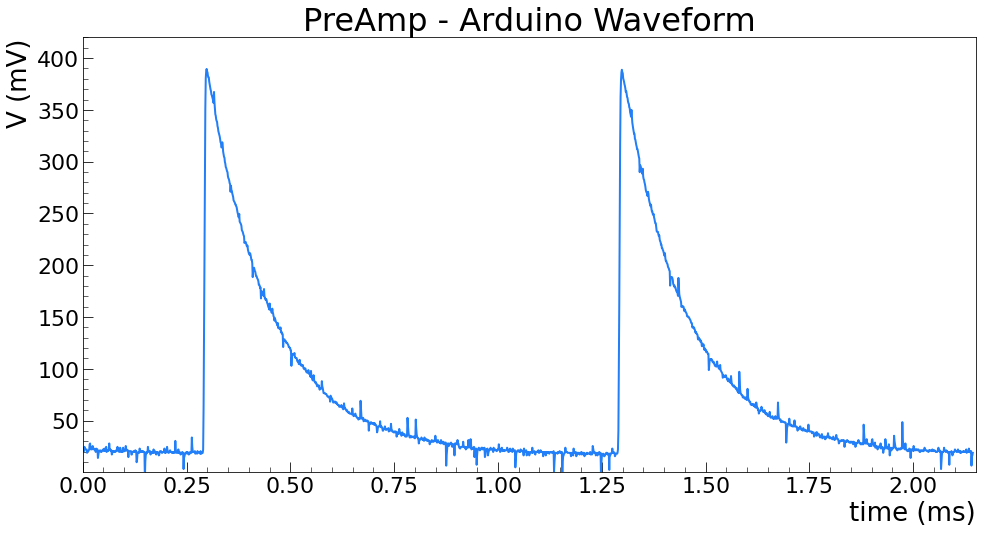

In [8]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)

# PLOT DATA
ax1.plot(data['time (ms)'], data['V (mV)'], color = '#227FF7', linewidth = 2, label = 'Data')
# ax1.plot(data['time'], data['V (V)'], color = '#227FF7', linewidth = 2, label = 'Data')

# PLOT TITLE
ax1.set_title('PreAmp - Arduino Waveform', fontsize = 32)

# AXIS LABELS
ax1.set_xlabel('time (ms)', fontsize = 26, loc = 'right')
ax1.set_ylabel('V (mV)', fontsize = 26, loc = 'top')

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()

# PLOT RANGE
ax1.set_xlim(left = 0, right = 2.15)
ax1.set_ylim(bottom = 0.01, top = 0.42  * 1e3)

#fig.savefig('../../Plots/PreAmp/preamp_waveform.png', dpi = 300, facecolor = 'white')

plt.show()

In [9]:
# SPLIT DATA INTO TWO DATAFRAMES
data1 = data.iloc[284:1231,:]
data2 = data.iloc[1239:,:]

In [10]:
# TRASLAZIONE A ZERO
data1['time'] = data1['time'] - 284
data2['time'] = data2['time'] - 1239

In [11]:
data1.reset_index(inplace = True)
data1.drop(labels = 'index', axis = 1, inplace=True)
data2.reset_index(inplace = True)
data2.drop(labels = 'index', axis = 1, inplace=True)

In [12]:
data1['time (ms)'] = data1['time'] * 1e3 * 955000**-1
data2['time (ms)'] = data2['time'] * 1e3 * 955000**-1

In [13]:
data1 = data1[data1['time (ms)'] < 0.8]
data2 = data2[data2['time (ms)'] < 0.8]

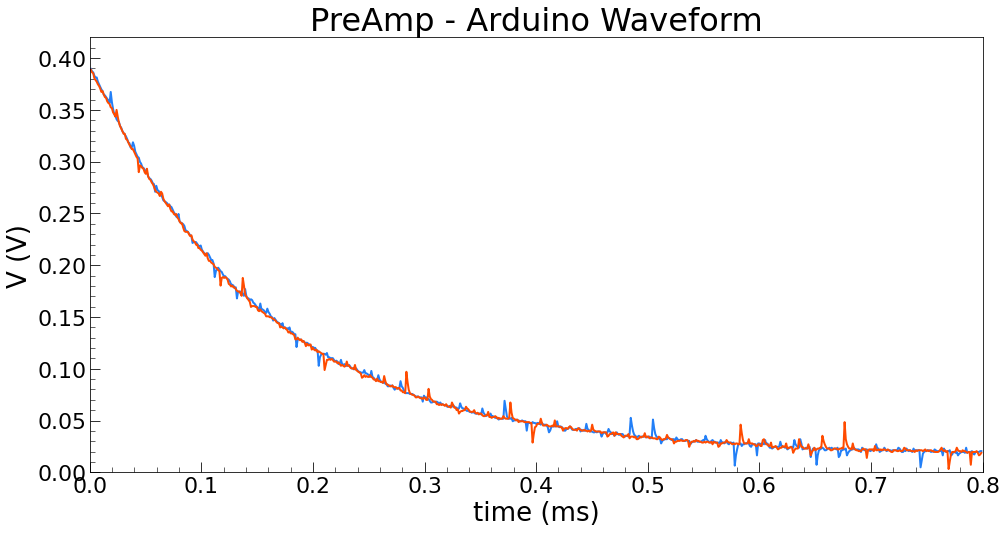

In [14]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)

# PLOT DATA
ax1.plot(data1['time (ms)'], data1['V (V)'], color = '#227FF7', linewidth = 2, label = 'Data')
ax1.plot(data2['time (ms)'], data2['V (V)'], color = '#FF4B00', linewidth = 2, label = 'Data')
# ax1.plot(data['time'], data['V (V)'], color = '#227FF7', linewidth = 2, label = 'Data')

# PLOT TITLE
ax1.set_title('PreAmp - Arduino Waveform', fontsize = 32)

# AXIS LABELS
ax1.set_xlabel('time (ms)', fontsize = 26)
ax1.set_ylabel('V (V)', fontsize = 26)

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()

# PLOT RANGE
ax1.set_xlim(left = 0, right = 0.8)
ax1.set_ylim(bottom = 0, top = 0.42)

plt.show()

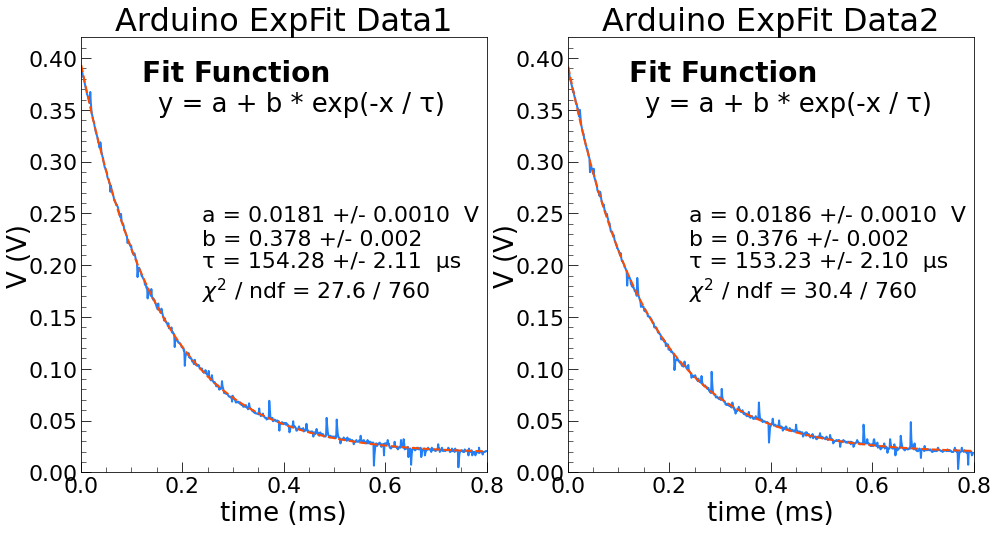

In [15]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# ----------------- DATA 1 
par, cov = curve_fit(f = esp, xdata = data1['time (ms)'], ydata = data1['V (V)'], maxfev=1000, 
                    p0 = [0.02, 0.6, 0.151], sigma = data1['err Vr (V)'], absolute_sigma = True)

func = esp(data1['time (ms)'], *par)

# COMPUTE RESIDUALS
res = data1['V (V)'] - func

# COMPUTE CHI2
chi2 = np.sum((res/data1['err Vr (V)'])**2)

# GET FIT PARAMETERS AND PARAMETER ERRORS
error = []
for i in range(len(par)):
    try:
        error.append(np.absolute(cov[i][i])**0.5)
    except:
        error.append( 0.00 )

fit_par = par
fit_err = np.array(error)

a = fit_par[0]
b = fit_par[1]
tau = fit_par[2]
a_err = fit_err[0]
b_err = fit_err[1]
tau_err = fit_err[2]


# ----------------- DATA 2 
par2, cov2 = curve_fit(f = esp, xdata = data2['time (ms)'], ydata = data2['V (V)'], maxfev=1000, 
                    p0 = [0.02, 0.6, 0.151], sigma = data2['err Vr (V)'], absolute_sigma = True)

func2 = esp(data2['time (ms)'], *par2)

# COMPUTE RESIDUALS
res2 = data2['V (V)'] - func2

# COMPUTE CHI2
chi22 = np.sum((res2/data2['err Vr (V)'])**2)

# GET FIT PARAMETERS AND PARAMETER ERRORS
error2 = []
for i in range(len(par2)):
    try:
        error2.append(np.absolute(cov2[i][i])**0.5)
    except:
        error2.append( 0.00 )

fit_par2 = par2
fit_err2 = np.array(error2)

a2 = fit_par2[0]
b2 = fit_par2[1]
tau2 = fit_par2[2]
a_err2 = fit_err2[0]
b_err2 = fit_err2[1]
tau_err2 = fit_err2[2]

# PLOT DATA
ax1.plot(data1['time (ms)'], data1['V (V)'], color = '#227FF7', linewidth = 2, label = 'Data')
ax1.plot(data1['time (ms)'], func, color = '#FF4B00', linewidth = 2, linestyle = 'dashed', label = 'Fit')

ax2.plot(data2['time (ms)'], data2['V (V)'], color = '#227FF7', linewidth = 2, label = 'Data')
ax2.plot(data2['time (ms)'], func2, color = '#FF4B00', linewidth = 2, linestyle = 'dashed', label = 'Fit')

aa = 'a = ' + format(a, '1.4f') + ' +/- ' + format(a_err, '1.4f') + '  V'
bb = 'b = ' + format(b, '1.3f') + ' +/- ' + format(b_err, '1.3f')
cc = '\u03C4 = ' + format(tau * 1e3, '1.2f') + ' +/- ' + format(tau_err * 1e3, '1.2f') + '  \u03BCs'
chisq = '$\chi^{2}$ / ndf = ' + format(chi2, '1.1f') + ' / ' + format(len(data1['time (ms)'] ) - len(par), '1.0f') 


ax1.text(0.15, 0.90, 'Fit Function', fontsize = 28, fontweight = 'bold', transform=ax1.transAxes)
ax1.text(0.19, 0.83, 'y = a + b * exp(-x / \u03C4)', fontsize = 26, color = '#000000', transform = ax1.transAxes)
ax1.text(0.30, 0.4, aa + '\n' + bb + '\n' + cc + '\n' + chisq, fontsize = 22, color = '#000000', transform = ax1.transAxes)

aa2 = 'a = ' + format(a2, '1.4f') + ' +/- ' + format(a_err2, '1.4f') + '  V'
bb2 = 'b = ' + format(b2, '1.3f') + ' +/- ' + format(b_err2, '1.3f')
cc2 = '\u03C4 = ' + format(tau2 * 1e3, '1.2f') + ' +/- ' + format(tau_err2 * 1e3, '1.2f') + '  \u03BCs'
chisq2 = '$\chi^{2}$ / ndf = ' + format(chi22, '1.1f') + ' / ' + format(len(data2['time (ms)'] ) - len(par2), '1.0f') 


ax2.text(0.15, 0.90, 'Fit Function', fontsize = 28, fontweight = 'bold', transform=ax2.transAxes)
ax2.text(0.19, 0.83, 'y = a + b * exp(-x / \u03C4)', fontsize = 26, color = '#000000', transform = ax2.transAxes)
ax2.text(0.30, 0.4, aa2 + '\n' + bb2 + '\n' + cc2 + '\n' + chisq2, fontsize = 22, color = '#000000', transform = ax2.transAxes)

# PLOT TITLE
ax1.set_title('Arduino ExpFit Data1', fontsize = 32)
ax2.set_title('Arduino ExpFit Data2', fontsize = 32)

# AXIS LABELS
ax1.set_xlabel('time (ms)', fontsize = 26)
ax1.set_ylabel('V (V)', fontsize = 26, labelpad = -5)
ax2.set_xlabel('time (ms)', fontsize = 26)
ax2.set_ylabel('V (V)', fontsize = 26, labelpad = -5)

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()
ax2.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax2.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax2.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax2.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax2.minorticks_on()

# PLOT RANGE
ax1.set_xlim(left = 0, right = 0.8)
ax1.set_ylim(bottom = 0, top = 0.42)
ax2.set_xlim(left = 0, right = 0.8)
ax2.set_ylim(bottom = 0, top = 0.42)

plt.show()

In [16]:
lin_data1 = data1.copy()
lin_data2 = data2.copy()

In [17]:
lin_data1['normV (V)'] = lin_data1['V (V)'] - a
lin_data1['err normVr (V)'] = np.sqrt(lin_data1['err Vr (V)']**2 + a_err**2)

lin_data1 = lin_data1[(lin_data1['normV (V)'] > 0)]

lin_data1['logV'] = np.log(lin_data1['normV (V)'])
lin_data1['err logV'] = lin_data1['err normVr (V)'] / lin_data1['normV (V)']

lin_data1 = lin_data1[(lin_data1['err logV'] < 1)]
lin_data1 = lin_data1[(lin_data1['time (ms)'] < 0.5)]

lin_data1

,time,ADC,time (ms),V (V),err V (V),err Vr (V),V (mV),err V (mV),err Vr (mV),normV (V),err normVr (V),logV,err logV
0,1,1241,0.001047,0.389579,0.021553,0.014785,389.578652,21.553122,14.784954,0.371478,0.01482,-0.990265,0.039894
1,2,1238,0.002094,0.387107,0.021526,0.014785,387.106856,21.525553,14.784954,0.369007,0.01482,-0.996941,0.040161
2,3,1237,0.003141,0.386283,0.021516,0.014785,386.282924,21.516370,14.784954,0.368183,0.01482,-0.999176,0.040251
3,4,1233,0.004188,0.382987,0.021480,0.014785,382.987196,21.479674,14.784954,0.364887,0.01482,-1.008168,0.040615
4,5,1231,0.005236,0.381339,0.021461,0.014785,381.339332,21.461347,14.784954,0.363239,0.01482,-1.012694,0.040799
...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,473,810,0.495288,0.034464,0.017982,0.014785,34.463952,17.982500,14.784954,0.016364,0.01482,-4.112694,0.905650
473,474,810,0.496335,0.034464,0.017982,0.014785,34.463952,17.982500,14.784954,0.016364,0.01482,-4.112694,0.905650
474,475,810,0.497382,0.034464,0.017982,0.014785,34.463952,17.982500,14.784954,0.016364,0.01482,-4.112694,0.905650
475,476,810,0.498429,0.034464,0.017982,0.014785,34.463952,17.982500,14.784954,0.016364,0.01482,-4.112694,0.905650


In [18]:
lin_data2['normV (V)'] = lin_data2['V (V)'] - a2
lin_data2['err normVr (V)'] = np.sqrt(lin_data2['err Vr (V)']**2 + a_err2**2)

lin_data2 = lin_data2[(lin_data2['normV (V)'] > 0)]

lin_data2['logV'] = np.log(lin_data2['normV (V)'])
lin_data2['err logV'] = lin_data2['err normVr (V)'] / lin_data2['normV (V)']

lin_data2 = lin_data2[(lin_data2['err logV'] < 1)]
lin_data2 = lin_data2[(lin_data2['time (ms)'] < 0.5)]

lin_data2

,time,ADC,time (ms),V (V),err V (V),err Vr (V),V (mV),err V (mV),err Vr (mV),normV (V),err normVr (V),logV,err logV
0,1,1240,0.001047,0.388755,0.021544,0.014785,388.754720,21.543929,14.784954,0.370118,0.014819,-0.993932,0.040039
1,2,1237,0.002094,0.386283,0.021516,0.014785,386.282924,21.516370,14.784954,0.367647,0.014819,-1.000633,0.040309
2,3,1236,0.003141,0.385459,0.021507,0.014785,385.458992,21.507191,14.784954,0.366823,0.014819,-1.002877,0.040399
3,4,1230,0.004188,0.380515,0.021452,0.014785,380.515400,21.452189,14.784954,0.361879,0.014819,-1.016445,0.040951
4,5,1228,0.005236,0.378868,0.021434,0.014785,378.867535,21.433883,14.784954,0.360231,0.014819,-1.021009,0.041138
...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,473,810,0.495288,0.034464,0.017982,0.014785,34.463952,17.982500,14.784954,0.015828,0.014819,-4.145998,0.936292
473,474,810,0.496335,0.034464,0.017982,0.014785,34.463952,17.982500,14.784954,0.015828,0.014819,-4.145998,0.936292
474,475,814,0.497382,0.037760,0.018011,0.014785,37.759680,18.011321,14.784954,0.019123,0.014819,-3.956844,0.774931
475,476,809,0.498429,0.033640,0.017975,0.014785,33.640020,17.975310,14.784954,0.015004,0.014819,-4.199458,0.987708


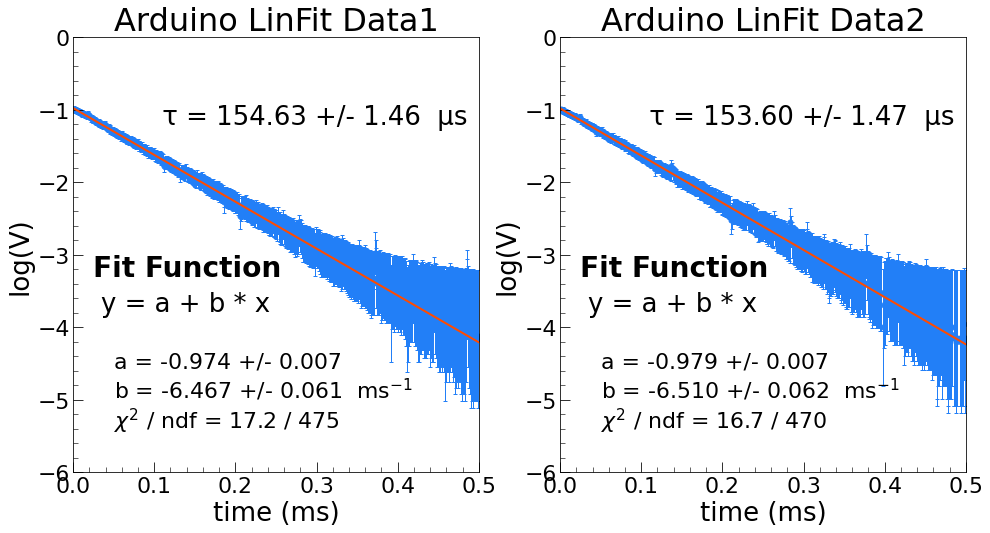

In [19]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# PERFORM THE FIT
par, cov = curve_fit(f = lin, xdata = lin_data1['time (ms)'], ydata = lin_data1['logV'], sigma = lin_data1['err logV'], absolute_sigma=True)

func = lin(lin_data1['time (ms)'], *par)

# COMPUTE RESIDUALS
res = lin_data1['logV'] - func

# COMPUTE CHI2
chi2 = np.sum((res/lin_data1['err logV'])**2)

# GET FIT PARAMETERS AND PARAMETER ERRORS
error = []
for i in range(len(par)):
    try:
        error.append(np.absolute(cov[i][i])**0.5)
    except:
        error.append( 0.00 )

fit_par = par
fit_err = np.array(error)

a = fit_par[0]
b = fit_par[1]
err_a = fit_err[0]
err_b = fit_err[1]


# PERFORM THE FIT
par2, cov2 = curve_fit(f = lin, xdata = lin_data2['time (ms)'], ydata = lin_data2['logV'], sigma = lin_data2['err logV'], absolute_sigma=True)

func2 = lin(lin_data2['time (ms)'], *par2)

# COMPUTE RESIDUALS
res2 = lin_data2['logV'] - func2

# COMPUTE CHI2
chi22 = np.sum((res2/lin_data2['err logV'])**2)

# GET FIT PARAMETERS AND PARAMETER ERRORS
error2 = []
for i in range(len(par2)):
    try:
        error2.append(np.absolute(cov2[i][i])**0.5)
    except:
        error2.append( 0.00 )

fit_par2 = par2
fit_err2 = np.array(error2)

a2 = fit_par2[0]
b2 = fit_par2[1]
err_a2 = fit_err2[0]
err_b2 = fit_err2[1]

# PLOT DATA
ax1.errorbar(lin_data1['time (ms)'], lin_data1['logV'], xerr = 0, yerr = lin_data1['err logV'], elinewidth=1, capsize=2, color = '#227FF7', linewidth = 0, marker = '.', markersize = 10, label = 'lin_data1', zorder = 1)
ax2.errorbar(lin_data2['time (ms)'], lin_data2['logV'], xerr = 0, yerr = lin_data2['err logV'], elinewidth=1, capsize=2, color = '#227FF7', linewidth = 0, marker = '.', markersize = 10, label = 'lin_data1', zorder = 1)

ax1.plot(lin_data1['time (ms)'], func, color = '#FF4B00', linewidth = 2, label = 'Fit', zorder = 2)
ax2.plot(lin_data2['time (ms)'], func2, color = '#FF4B00', linewidth = 2, label = 'Fit', zorder = 2)

# ax1.plot(lin_data1['time (ms)'], lin_data1['V (V)'], color = '#227FF7', linewidth = 2, label = 'Data')
# ax1.plot(final_data['time (ms)'], final_data['V (V)'], color = '#FF4B00', linewidth = 2, label = 'Data')

aa = 'a = ' + format(a, '1.3f') + ' +/- ' + format(err_a, '1.3f')
bb = 'b = ' + format(b, '1.3f') + ' +/- ' + format(err_b, '1.3f') + '  ms$^{-1}$'
tau = ' \u03C4 = ' + format(-b**-1 * 1e3, '1.2f') + ' +/- ' + format(err_b * b**-2 * 1e3, '1.2f') + '  \u03BCs'
chisq = '$\chi^{2}$ / ndf = ' + format(chi2, '1.1f') + ' / ' + format(len(lin_data1['time (ms)'] ) - len(par), '1.0f') 
ax1.text(0.05, 0.45, 'Fit Function', fontsize = 28, fontweight = 'bold', transform=ax1.transAxes)
ax1.text(0.07, 0.37, 'y = a + b * x', fontsize = 26, color = '#000000', transform = ax1.transAxes)
ax1.text(0.1, 0.1, aa + '\n' + bb + '\n' + chisq, fontsize = 22, color = '#000000', transform = ax1.transAxes)
ax1.text(0.2, 0.8, tau, fontsize = 26, color = '#000000', transform = ax1.transAxes)

aa2 = 'a = ' + format(a2, '1.3f') + ' +/- ' + format(err_a2, '1.3f')
bb2 = 'b = ' + format(b2, '1.3f') + ' +/- ' + format(err_b2, '1.3f') + '  ms$^{-1}$'
tau2 = ' \u03C4 = ' + format(-b2**-1 * 1e3, '1.2f') + ' +/- ' + format(err_b2 * b2**-2 * 1e3, '1.2f') + '  \u03BCs'
chisq2 = '$\chi^{2}$ / ndf = ' + format(chi22, '1.1f') + ' / ' + format(len(lin_data2['time (ms)'] ) - len(par2), '1.0f') 
ax2.text(0.05, 0.45, 'Fit Function', fontsize = 28, fontweight = 'bold', transform=ax2.transAxes)
ax2.text(0.07, 0.37, 'y = a + b * x', fontsize = 26, color = '#000000', transform = ax2.transAxes)
ax2.text(0.1, 0.1, aa2 + '\n' + bb2 + '\n' + chisq2, fontsize = 22, color = '#000000', transform = ax2.transAxes)
ax2.text(0.2, 0.8, tau2, fontsize = 26, color = '#000000', transform = ax2.transAxes)

# PLOT TITLE
ax1.set_title('Arduino LinFit Data1', fontsize = 32)
ax2.set_title('Arduino LinFit Data2', fontsize = 32)

# AXIS LABELS
ax1.set_xlabel('time (ms)', fontsize = 26)
ax1.set_ylabel('log(V)', fontsize = 26)
ax2.set_xlabel('time (ms)', fontsize = 26)
ax2.set_ylabel('log(V)', fontsize = 26)

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()
ax2.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax2.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax2.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax2.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax2.minorticks_on()

# PLOT RANGE
ax1.set_xlim(left = 0, right = 0.5)
ax1.set_ylim(bottom = -6, top = 0)
ax2.set_xlim(left = 0, right = 0.5)
ax2.set_ylim(bottom = -6, top = 0)

plt.show()

In [20]:
V1 = data1['V (V)']
V2 = data2['V (V)']
V_12 = pd.concat((V1, V2))
V_12

V = V_12.groupby(V_12.index)
V_mean = V.mean()

err_V_mean = data1['err Vr (V)'] * 2**-0.5

final_data = pd.concat([data1['time'], data1['time (ms)'], V_mean, err_V_mean], axis=1)
final_data = final_data[(final_data['time (ms)'] < 0.8)]
final_data

,time,time (ms),V (V),err Vr (V)
0,1,0.001047,0.389167,0.010455
1,2,0.002094,0.386695,0.010455
2,3,0.003141,0.385871,0.010455
3,4,0.004188,0.381751,0.010455
4,5,0.005236,0.380103,0.010455
...,...,...,...,...
758,759,0.794764,0.020045,0.010455
759,760,0.795812,0.019221,0.010455
760,761,0.796859,0.017985,0.010455
761,762,0.797906,0.018809,0.010455


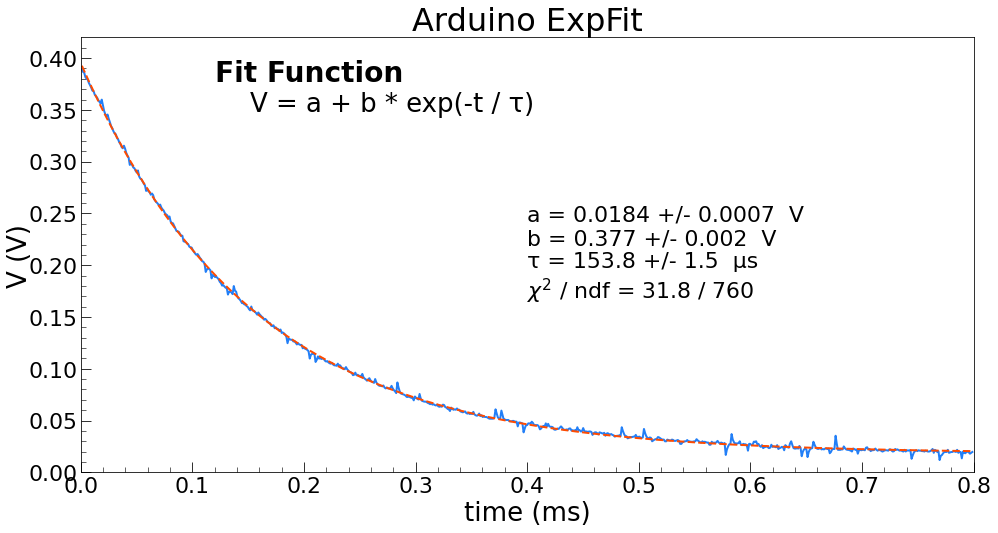

In [21]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)

# FILTERED FIT
par, cov = curve_fit(f = esp, xdata = final_data['time (ms)'], ydata = final_data['V (V)'], maxfev=1000, 
                    p0 = [0.02, 0.6, 0.151], sigma = final_data['err Vr (V)'], absolute_sigma = True)

func = esp(final_data['time (ms)'], *par)

# COMPUTE RESIDUALS
res = final_data['V (V)'] - func

# COMPUTE CHI2
chi2 = np.sum((res/final_data['err Vr (V)'])**2)

# GET FIT PARAMETERS AND PARAMETER ERRORS
error = []
for i in range(len(par)):
    try:
        error.append(np.absolute(cov[i][i])**0.5)
    except:
        error.append( 0.00 )

fit_par = par
fit_err = np.array(error)

a = fit_par[0]
b = fit_par[1]
tau = fit_par[2]
a_err = fit_err[0]
b_err = fit_err[1]
tau_err = fit_err[2]

# PLOT DATA
ax1.plot(final_data['time (ms)'], final_data['V (V)'], color = '#227FF7', linewidth = 2, label = 'Data')
ax1.plot(final_data['time (ms)'], func, color = '#FF4B00', linewidth = 2, linestyle = 'dashed', label = 'Fit')

aa = 'a = ' + format(a, '1.4f') + ' +/- ' + format(a_err, '1.4f') + '  V'
bb = 'b = ' + format(b, '1.3f') + ' +/- ' + format(b_err, '1.3f') + '  V'
cc = '\u03C4 = ' + format(tau * 1e3, '1.1f') + ' +/- ' + format(tau_err * 1e3, '1.1f') + '  \u03BCs'
chisq = '$\chi^{2}$ / ndf = ' + format(chi2, '1.1f') + ' / ' + format(len(final_data['time (ms)'] ) - len(par), '1.0f') 


ax1.text(0.15, 0.90, 'Fit Function', fontsize = 28, fontweight = 'bold', transform=ax1.transAxes)
ax1.text(0.19, 0.83, 'V = a + b * exp(-t / \u03C4)', fontsize = 26, color = '#000000', transform = ax1.transAxes)
ax1.text(0.5, 0.4, aa + '\n' + bb + '\n' + cc + '\n' + chisq, fontsize = 22, color = '#000000', transform = ax1.transAxes)

# PLOT TITLE
ax1.set_title('Arduino ExpFit', fontsize = 32)

# AXIS LABELS
ax1.set_xlabel('time (ms)', fontsize = 26)
ax1.set_ylabel('V (V)', fontsize = 26, labelpad = -5)

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()

# PLOT RANGE
ax1.set_xlim(left = 0, right = 0.8)
ax1.set_ylim(bottom = 0, top = 0.42)

plt.show()

In [22]:
lin_data = final_data.copy()

In [23]:
lin_data['normVa (V)'] = lin_data['V (V)'] - a
lin_data['err normVra (V)'] = np.sqrt(lin_data['err Vr (V)']**2 + a_err**2)

lin_data = lin_data[(lin_data['normVa (V)'] > 0)]

lin_data['normV (V)'] = lin_data['normVa (V)'] / b
lin_data['err normVr (V)'] = np.sqrt( ( lin_data['err normVra (V)'] / b )**2 + ( lin_data['normVa (V)'] * b_err / b**2 )**2)

lin_data['logV'] = np.log(lin_data['normV (V)'])
lin_data['err logV'] = lin_data['err normVr (V)'] / lin_data['normV (V)']

lin_data = lin_data[(lin_data['err logV'] < 1)]
lin_data = lin_data[(lin_data['time (ms)'] < 0.5)]

lin_data

,time,time (ms),V (V),err Vr (V),normVa (V),err normVra (V),normV (V),err normVr (V),logV,err logV
0,1,0.001047,0.389167,0.010455,0.370798,0.010479,0.984050,0.028179,-0.016079,0.028635
1,2,0.002094,0.386695,0.010455,0.368326,0.010479,0.977490,0.028174,-0.022767,0.028823
2,3,0.003141,0.385871,0.010455,0.367502,0.010479,0.975303,0.028172,-0.025007,0.028886
3,4,0.004188,0.381751,0.010455,0.363382,0.010479,0.964370,0.028164,-0.036280,0.029205
4,5,0.005236,0.380103,0.010455,0.361734,0.010479,0.959997,0.028161,-0.040825,0.029334
...,...,...,...,...,...,...,...,...,...,...
472,473,0.495288,0.034464,0.010455,0.016095,0.010479,0.042714,0.027811,-3.153230,0.651089
473,474,0.496335,0.034464,0.010455,0.016095,0.010479,0.042714,0.027811,-3.153230,0.651089
474,475,0.497382,0.036112,0.010455,0.017743,0.010479,0.047087,0.027811,-3.055755,0.590622
475,476,0.498429,0.034052,0.010455,0.015683,0.010479,0.041621,0.027811,-3.179160,0.668191


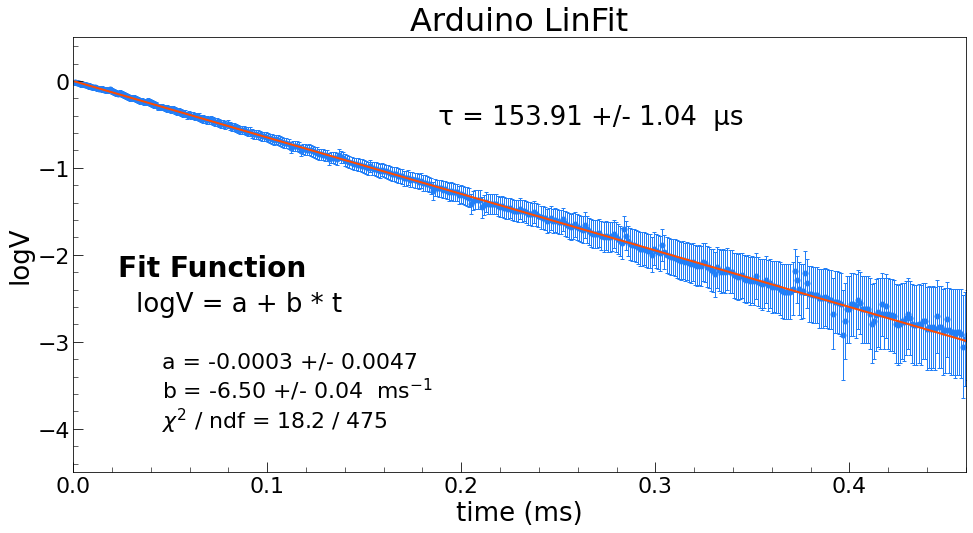

In [24]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)

# PERFORM THE FIT
par, cov = curve_fit(f = lin, xdata = lin_data['time (ms)'], ydata = lin_data['logV'], sigma = lin_data['err logV'], absolute_sigma=True)

func = lin(lin_data['time (ms)'], *par)

# COMPUTE RESIDUALS
res = lin_data['logV'] - func

# COMPUTE CHI2
chi2 = np.sum((res/lin_data['err logV'])**2)

# GET FIT PARAMETERS AND PARAMETER ERRORS
error = []
for i in range(len(par)):
    try:
        error.append(np.absolute(cov[i][i])**0.5)
    except:
        error.append( 0.00 )

fit_par = par
fit_err = np.array(error)

a = fit_par[0]
b = fit_par[1]
err_a = fit_err[0]
err_b = fit_err[1]

# PLOT DATA
ax1.errorbar(lin_data['time (ms)'], lin_data['logV'], xerr = 0, yerr = lin_data['err logV'], elinewidth=1, capsize=2, color = '#227FF7', linewidth = 0, marker = '.', markersize = 10, label = 'lin_data', zorder = 1)

ax1.plot(lin_data['time (ms)'], func, color = '#FF4B00', linewidth = 2, label = 'Fit', zorder = 2, linestyle = 'solid')

# ax1.plot(lin_data['time (ms)'], lin_data['V (V)'], color = '#227FF7', linewidth = 2, label = 'Data')
# ax1.plot(final_data['time (ms)'], final_data['V (V)'], color = '#FF4B00', linewidth = 2, label = 'Data')

aa = 'a = ' + format(a, '1.4f') + ' +/- ' + format(err_a, '1.4f')
bb = 'b = ' + format(b, '1.2f') + ' +/- ' + format(err_b, '1.2f') + '  ms$^{-1}$'
tau = ' \u03C4 = ' + format(-b**-1 * 1e3, '1.2f') + ' +/- ' + format(err_b * b**-2 * 1e3, '1.2f') + '  \u03BCs'
chisq = '$\chi^{2}$ / ndf = ' + format(chi2, '1.1f') + ' / ' + format(len(lin_data['time (ms)'] ) - len(par), '1.0f') 

ax1.text(0.05, 0.45, 'Fit Function', fontsize = 28, fontweight = 'bold', transform=ax1.transAxes)
ax1.text(0.07, 0.37, 'logV = a + b * t', fontsize = 26, color = '#000000', transform = ax1.transAxes)
ax1.text(0.1, 0.1, aa + '\n' + bb + '\n' + chisq, fontsize = 22, color = '#000000', transform = ax1.transAxes)
ax1.text(0.4, 0.8, tau, fontsize = 26, color = '#000000', transform = ax1.transAxes)

# PLOT TITLE
ax1.set_title('Arduino LinFit', fontsize = 32)

# AXIS LABELS
ax1.set_xlabel('time (ms)', fontsize = 26)
ax1.set_ylabel('logV', fontsize = 26)

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()

# PLOT RANGE
ax1.set_xlim(left = 0, right = 0.46)
#ax1.set_ylim(bottom = -6, top = 0)

plt.show()

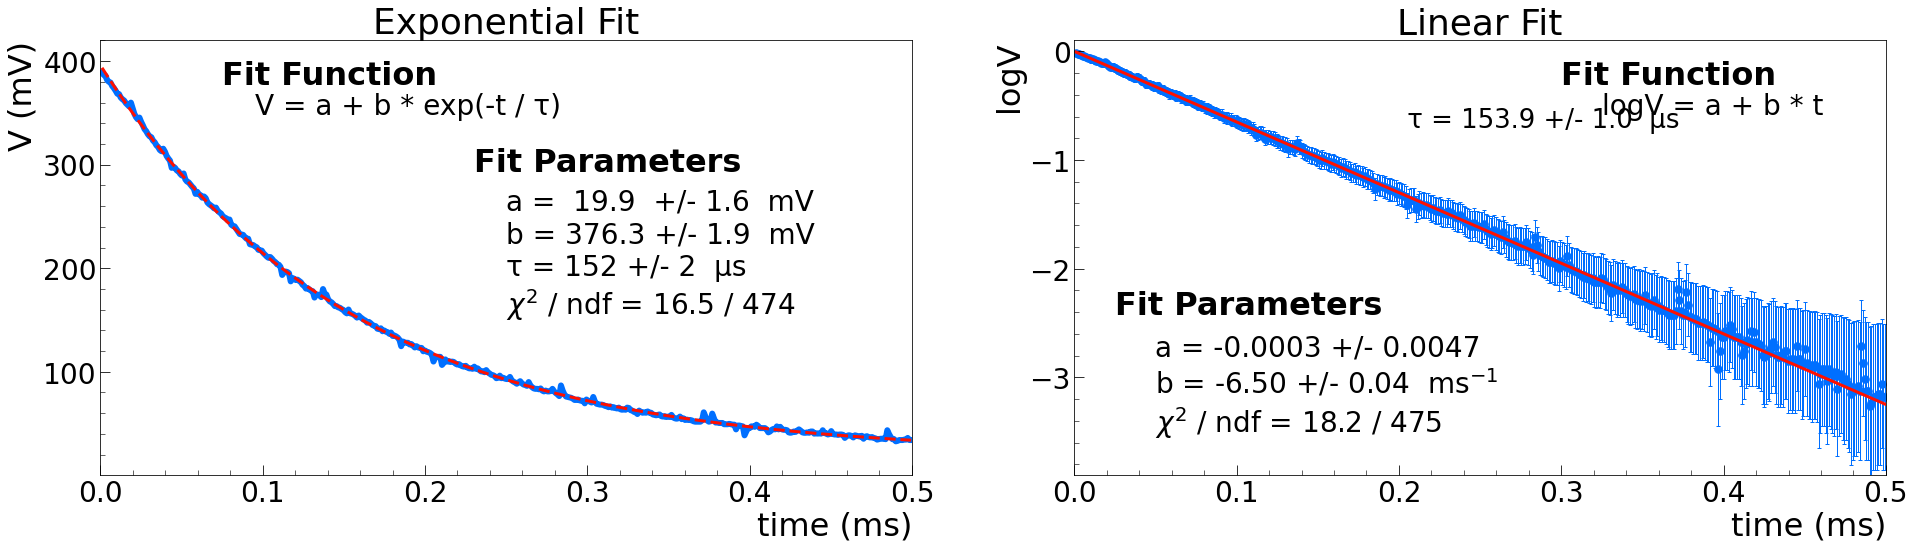

In [25]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(32,8))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

final_data = final_data[(final_data['time (ms)'] < 0.5)]
# EXP FIT
par_exp, cov_exp = curve_fit(f = esp, xdata = final_data['time (ms)'], ydata = final_data['V (V)'], maxfev=1000, 
                    p0 = [0.02, 0.6, 0.151], sigma = final_data['err Vr (V)'], absolute_sigma = True)

func_exp = esp(final_data['time (ms)'], *par_exp)

# COMPUTE RESIDUALS
res_exp = final_data['V (V)'] - func_exp

# COMPUTE CHI2
chi2_exp = np.sum((res_exp/final_data['err Vr (V)'])**2)

# GET FIT PARAMETERS AND PARAMETER ERRORS
error_exp = []
for i in range(len(par_exp)):
    try:
        error_exp.append(np.absolute(cov_exp[i][i])**0.5)
    except:
        error_exp.append( 0.00 )

fit_par_exp = par_exp
fit_err_exp = np.array(error_exp)

a_exp = fit_par_exp[0]
b_exp = fit_par_exp[1]
tau_exp = fit_par_exp[2]
a_err_exp = fit_err_exp[0]
b_err_exp = fit_err_exp[1]
tau_err_exp = fit_err_exp[2]

# PLOT DATA
ax1.plot(final_data['time (ms)'], final_data['V (V)'] * 1e3, color = '#006FFF', linewidth = 6, label = 'Data')
ax1.plot(final_data['time (ms)'], func_exp * 1e3, color = '#ff1000', linewidth = 3, linestyle = 'dashed', label = 'Fit')

aa_exp = 'a =  ' + format(a_exp * 1e3, '1.1f') + '  +/- ' + format(a_err_exp * 1e3, '1.1f') + '  mV'
bb_exp = 'b = ' + format(b_exp * 1e3, '1.1f') + ' +/- ' + format(b_err_exp * 1e3, '1.1f') + '  mV'
cc_exp = '\u03C4 = ' + format(tau_exp * 1e3, '1.0f') + ' +/- ' + format(tau_err_exp * 1e3, '1.0f') + '  \u03BCs'
chisq_exp = '$\chi^{2}$ / ndf = ' + format(chi2_exp, '1.1f') + ' / ' + format(len(final_data['time (ms)'] ) - len(par_exp), '1.0f') 


ax1.text(0.15, 0.90, 'Fit Function', fontsize = 32, fontweight = 'bold', transform=ax1.transAxes)
ax1.text(0.19, 0.83, 'V = a + b * exp(-t / \u03C4)', fontsize = 28, color = '#000000', transform = ax1.transAxes)
ax1.text(0.46, 0.7, 'Fit Parameters', fontsize = 32, fontweight = 'bold', transform=ax1.transAxes)
ax1.text(0.5, 0.37, aa_exp + '\n' + bb_exp + '\n' + cc_exp + '\n' + chisq_exp, fontsize = 28, color = '#000000', transform = ax1.transAxes)

# PLOT TITLE
ax1.set_title('Exponential Fit', fontsize = 36)

# AXIS LABELS
ax1.set_xlabel('time (ms)', fontsize = 32, loc = 'right')
ax1.set_ylabel('V (mV)', fontsize = 32, labelpad = 5, loc = 'top')

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 28, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 28, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()

# PLOT RANGE
ax1.set_xlim(left = 0, right = 0.5)
ax1.set_ylim(bottom = 0.0001, top = 0.42 * 1e3)


# PERFORM THE LINEAR FIT
par_lin, cov_lin = curve_fit(f = lin, xdata = lin_data['time (ms)'], ydata = lin_data['logV'], sigma = lin_data['err logV'], absolute_sigma=True)

func_lin = lin(lin_data['time (ms)'], *par_lin)

# COMPUTE RESIDUALS
res_lin = lin_data['logV'] - func_lin

# COMPUTE CHI2
chi2_lin = np.sum((res_lin/lin_data['err logV'])**2)

# GET FIT PARAMETERS AND PARAMETER ERRORS
error_lin = []
for i in range(len(par_lin)):
    try:
        error_lin.append(np.absolute(cov_lin[i][i])**0.5)
    except:
        error_lin.append( 0.00 )

fit_par_lin = par_lin
fit_err_lin = np.array(error_lin)

a_lin = fit_par_lin[0]
b_lin = fit_par_lin[1]
err_a_lin = fit_err_lin[0]
err_b_lin= fit_err_lin[1]
tau_lin = -b_lin**-1
err_tau_lin = err_b_lin * b_lin**-2

# PLOT DATA
ax2.errorbar(lin_data['time (ms)'], lin_data['logV'], xerr = 0, yerr = lin_data['err logV'], elinewidth=1, capsize=2, color = '#006FFF', linewidth = 0, marker = '.', markersize = 15, label = 'lin_data', zorder = 1)

ax2.plot(lin_data['time (ms)'], func_lin, color = '#ff1000', linewidth = 3, label = 'Fit', zorder = 2, linestyle = 'solid')

# ax1.plot(lin_data['time (ms)'], lin_data['V (V)'], color = '#227FF7', linewidth = 2, label = 'Data')
# ax1.plot(final_data['time (ms)'], final_data['V (V)'], color = '#FF4B00', linewidth = 2, label = 'Data')

aa_lin = 'a = ' + format(a_lin, '1.4f') + ' +/- ' + format(err_a_lin, '1.4f')
bb_lin = 'b = ' + format(b_lin, '1.2f') + ' +/- ' + format(err_b_lin, '1.2f') + '  ms$^{-1}$'
tau_linn = ' \u03C4 = ' + format(tau_lin * 1e3, '1.1f') + ' +/- ' + format(err_tau_lin * 1e3, '1.1f') + '  \u03BCs'
chisq_lin = '$\chi^{2}$ / ndf = ' + format(chi2_lin, '1.1f') + ' / ' + format(len(lin_data['time (ms)'] ) - len(par_lin), '1.0f') 

ax2.text(0.6, 0.90, 'Fit Function', fontsize = 32, fontweight = 'bold', transform=ax2.transAxes)
ax2.text(0.65, 0.83, 'logV = a + b * t', fontsize = 28, color = '#000000', transform = ax2.transAxes)
ax2.text(0.05, 0.37, 'Fit Parameters', fontsize = 32, fontweight = 'bold', transform=ax2.transAxes)
ax2.text(0.1, 0.1, aa_lin + '\n' + bb_lin + '\n' + chisq_lin, fontsize = 28, color = '#000000', transform = ax2.transAxes)
ax2.text(0.4, 0.8, tau_linn, fontsize = 26, color = '#000000', transform = ax2.transAxes)

# PLOT TITLE
ax2.set_title('Linear Fit', fontsize = 36)

# AXIS LABELS
ax2.set_xlabel('time (ms)', fontsize = 32, loc = 'right')
ax2.set_ylabel('logV', fontsize = 32, loc = 'top')

# AXIS TICKS
ax2.tick_params(axis = 'both', which = 'major', labelsize = 28, direction = 'in', length = 10)
ax2.tick_params(axis = 'both', which = 'minor', labelsize = 28, direction = 'in', length = 5)
ax2.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax2.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax2.minorticks_on()

# PLOT RANGE
ax2.set_xlim(left = 0, right = 0.5)
ax2.set_ylim(bottom = -3.9, top = 0.1)

#fig.savefig('../../Plots/PreAmp/preamp_arduino_fit.png', dpi = 300, facecolor = 'white')

plt.show()

In [26]:
def comp(x, y, errx, erry):
    l = np.abs(x-y)/np.sqrt(errx**2 + erry**2)
    return l

In [27]:
Rf = 696060
Cf = 0.000000000232
FS_Rf = 1000000 
FS_Cf = 0.000000001 
L_Rf = 0.07 / 100
L_Cf = 2.5 / 100
D_Rf = 8
D_Cf = 15
Res_Rf = 10
Res_Cf = 1e-12
sigma_L_Rf = 0.58 * L_Rf * Rf
sigma_L_Cf = 0.58 * L_Cf * Cf
sigma_D_Rf = 0.58 * D_Rf * Res_Rf
sigma_D_Cf = 0.58 * D_Cf * Res_Cf
sigma_Rf = np.sqrt(sigma_L_Rf**2 + sigma_D_Rf**2)
sigma_Cf = np.sqrt(sigma_L_Cf**2 + sigma_D_Cf**2)

tau_th = Rf * Cf * 1e3
sigma_tau_th = np.sqrt( (Cf * sigma_Rf)**2 + (Rf * sigma_Cf)**2 ) * 1e3

In [28]:
comp(tau_th, tau_lin, sigma_tau_th, err_tau_lin)

1.151516338856601

In [35]:
tau_th

0.16148592

In [36]:
sigma_tau_th

0.006492997788939272

In [29]:
tau_lin

0.15391436411263532

In [30]:
err_tau_lin

0.0010370348893515382

In [31]:
ft = (2*np.pi*tau_lin)**-1

In [32]:
err_ft = (2*np.pi)**-1 * err_tau_lin * tau_lin**-2

In [33]:
print(
    'ft = ' + format(ft, '.3f') + ' +/- ' + format(err_ft, '.3f') + '  kHz'
)

ft = 1.034 +/- 0.007  kHz


In [34]:
comp(ft, 1.03, err_ft, 0.03)

0.1314570842945081